### Importing Libraries :


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading and Cleaning : 

In [2]:
flight_05 = pd.read_csv('/Users/rak/Desktop/2005.csv')
flight_06 = pd.read_csv('/Users/rak/Desktop/2006.csv')
flight_07 = pd.read_csv('/Users/rak/Desktop/2007.csv')
flight_08 = pd.read_csv('/Users/rak/Desktop/2008.csv')
airports = pd.read_csv('/Users/rak/Desktop/airports.csv')
carriers = pd.read_csv('/Users/rak/Desktop/carriers.csv')
plane_data = pd.read_csv('/Users/rak/Desktop/plane-data.csv')

In [3]:
print(flight_05.shape)
print(flight_06.shape)
print(flight_07.shape)
print(flight_08.shape)

(7140596, 29)
(7141922, 29)
(7453215, 29)
(2389217, 29)


In [4]:
#Dropping rows with cancelled or diverted flights:

flight_05=flight_05[flight_05['Cancelled']==0] 
flight_05=flight_05[flight_05['Diverted']==0] 

flight_06=flight_06[flight_06['Cancelled']==0] 
flight_06=flight_06[flight_06['Diverted']==0] 

flight_07=flight_07[flight_07['Cancelled']==0] 
flight_07=flight_07[flight_07['Diverted']==0] 

In [5]:
#Merging the Dataframes:

flight_data = pd.concat([flight_05, flight_06, flight_07],ignore_index=True)

In [6]:
flight_data.shape

(21271928, 29)

In [7]:
flight_data['DepTime'] = pd.to_datetime(flight_data['DepTime'], format='%H%M', errors='coerce')
flight_data['ArrTime'] = pd.to_datetime(flight_data['ArrTime'], format='%H%M', errors='coerce')

### Question 2 :

In [10]:
# Checking for null values in plane data
plane_data.isna().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [29]:
# Dropping rows with null values
plane_data = plane_data.dropna()

In [30]:
# Checking for null values again
plane_data.isna().sum()

TailNum          0
type             0
manufacturer     0
issue_date       0
model            0
status           0
aircraft_type    0
engine_type      0
year             0
dtype: int64

In [31]:

# rename 'Year' column in flight_data to 'FlightYear' to avoid confusion
flight_data.rename(columns={'Year': 'FlightYear'}, inplace=True)

# rename 'tailnum' in plane_data to 'TailNum' so it matches corresponding column in flight_data
plane_data = plane_data.rename(columns={'tailnum': 'TailNum'})

In [32]:
# merge the two datasets on 'TailNum'
merged_data = pd.merge(flight_data, plane_data, on='TailNum', how='left')

In [33]:
merged_data.shape

(21271928, 37)

In [34]:
merged_data.isna().sum()

FlightYear                  0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                 17937
CRSDepTime                  0
ArrTime                 78123
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     21271926
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
type                  4290640
manufacturer          4290640
issue_date            4290640
model                 4290640
status    

In [28]:
merged_data.shape

(1, 37)

In [35]:
merged_data=merged_data[merged_data['type'].isnull()==False]

In [38]:
merged_data.isna().sum()

FlightYear                  0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                 15554
CRSDepTime                  0
ArrTime                 65121
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     16981286
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
type                        0
manufacturer                0
issue_date                  0
model                       0
status    

In [39]:
plane_age_data = merged_data[['FlightYear','year', 'ArrDelay', 'DepDelay', 'TailNum']]

In [40]:
plane_age_data.shape

(16981288, 5)

In [41]:
plane_age_data

,FlightYear,year,ArrDelay,DepDelay,TailNum
0,2005,1992,-18.0,-2.0,N935UA
1,2005,1992,-23.0,-6.0,N941UA
2,2005,1988,-24.0,-7.0,N342UA
3,2005,1988,-33.0,-9.0,N326UA
4,2005,1990,3.0,34.0,N902UA
...,...,...,...,...,...
21271923,2007,1992,13.0,-7.0,N670DN
21271924,2007,2000,5.0,11.0,N829MH
21271925,2007,1987,15.0,-1.0,N623DL
21271926,2007,1990,36.0,38.0,N970DL


In [43]:
plane_age_data['TotalDelay']=plane_age_data['ArrDelay']+plane_age_data['DepDelay']

/var/folders/cg/q2v373c11dv1r9z3pywl94xm0000gn/T/ipykernel_20165/1785596324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_age_data['TotalDelay']=plane_age_data['ArrDelay']+plane_age_data['DepDelay']


In [44]:
plane_age_data['isDelay'] = plane_age_data['TotalDelay'].apply(lambda x: 1 if x > 0 else 0)

/var/folders/cg/q2v373c11dv1r9z3pywl94xm0000gn/T/ipykernel_20165/1149292794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_age_data['isDelay'] = plane_age_data['TotalDelay'].apply(lambda x: 1 if x > 0 else 0)


In [54]:
plane_age_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16981288 entries, 0 to 21271927
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   FlightYear  int64  
 1   year        object 
 2   ArrDelay    float64
 3   DepDelay    float64
 4   TailNum     object 
 5   TotalDelay  float64
 6   isDelay     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.0+ GB


In [65]:
plane_age_data = plane_age_data.replace('None', np.nan)
plane_age_data = plane_age_data.replace(0, np.nan)
plane_age_data = plane_age_data.dropna(subset=['year'])

In [67]:
plane_age_data['year']=plane_age_data['year'].astype(int)

In [68]:
plane_age_data['Plane_age'] = plane_age_data['FlightYear'] - plane_age_data['year']

In [69]:
plane_age_data

,FlightYear,year,ArrDelay,DepDelay,TailNum,TotalDelay,isDelay,Plane_age
0,2005.0,1992,-18.0,-2.0,N935UA,-20.0,NaN,13.0
1,2005.0,1992,-23.0,-6.0,N941UA,-29.0,NaN,13.0
2,2005.0,1988,-24.0,-7.0,N342UA,-31.0,NaN,17.0
3,2005.0,1988,-33.0,-9.0,N326UA,-42.0,NaN,17.0
4,2005.0,1990,3.0,34.0,N902UA,37.0,1.0,15.0
...,...,...,...,...,...,...,...,...
21271923,2007.0,1992,13.0,-7.0,N670DN,6.0,1.0,15.0
21271924,2007.0,2000,5.0,11.0,N829MH,16.0,1.0,7.0
21271925,2007.0,1987,15.0,-1.0,N623DL,14.0,1.0,20.0
21271926,2007.0,1990,36.0,38.0,N970DL,74.0,1.0,17.0


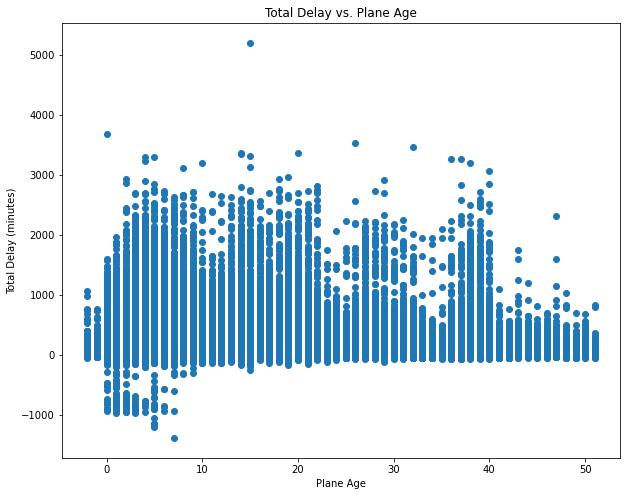

In [76]:
# create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# create a scatter plot with TotalDelay on the y-axis and PlaneAge on the x-axis
ax.scatter(plane_age_data['Plane_age'], plane_age_data['TotalDelay'])

# add axis labels and a title
ax.set_xlabel('Plane Age')
ax.set_ylabel('Total Delay (minutes)')
ax.set_title('Total Delay vs. Plane Age')

# display the plot
plt.show()

In [79]:
yearly_data = plane_age_data.groupby('Plane_age')['TotalDelay'].mean().reset_index()

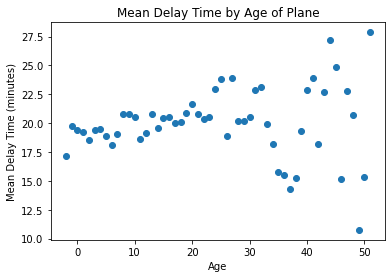

In [88]:
# create a scatter plot with Year on the x-axis and the mean delay time on the y-axis
plt.scatter(yearly_data['Plane_age'], yearly_data['TotalDelay'])
# add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Mean Delay Time (minutes)')
plt.title('Mean Delay Time by Age of Plane')

# display the plot
plt.show()

In [87]:
correlation_coefficient = plane_age_data['Plane_age'].corr(plane_age_data['TotalDelay']).round(4)

print(f"The correlation coefficient between the age of a plane and Total Delay is: {correlation_coefficient}")

The correlation coefficient between the age of a plane and Total Delay is: 0.0057


In [113]:
plane_age_data['age_group'] = pd.cut(plane_age_data['Plane_age'], bins=range(0, 60, 5))
delay_percentage = plane_age_data.groupby('age_group')['isDelay'].sum() / plane_age_data.groupby('age_group')['isDelay'].size() * 100

In [114]:
delay_percentage

age_group
(0, 5]      45.325654
(5, 10]     45.648529
(10, 15]    46.957317
(15, 20]    47.547737
(20, 25]    48.551580
(25, 30]    48.640315
(30, 35]    48.070406
(35, 40]    44.054496
(40, 45]    45.272223
(45, 50]    43.991240
(50, 55]    49.242424
Name: isDelay, dtype: float64

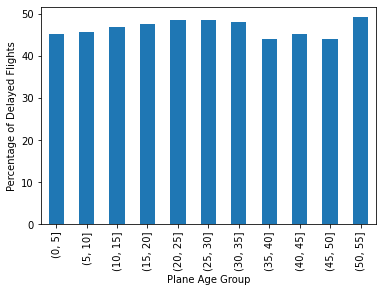

In [117]:
ax = delay_percentage.plot(x='age_group', y='isDelay', kind='bar')

ax.set_xlabel('Plane Age Group')
ax.set_ylabel('Percentage of Delayed Flights')
plt.show()

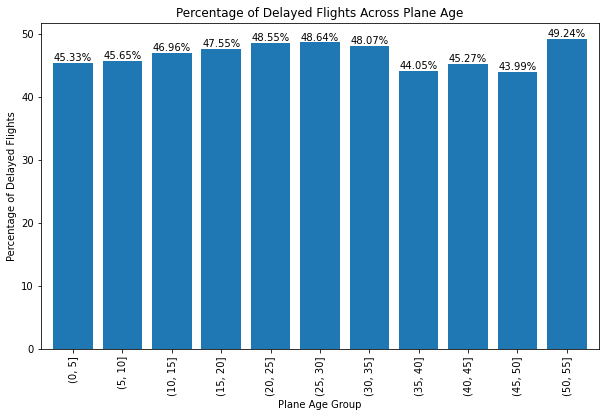

In [120]:
# create a bar plot to show the percentages
ax = delay_percentage.plot.bar(width=0.8, figsize=(10, 6))

# set the title and axis labels
ax.set_title('Percentage of Delayed Flights Across Plane Age')
ax.set_xlabel('Plane Age Group')
ax.set_ylabel('Percentage of Delayed Flights')

# add the percentages on the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}%', (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# display the plot
plt.show()